## Event Impact Modeling

In [1]:
import sys
import os
import pandas as pd 

project_root = os.path.abspath("..")
sys.path.append(project_root)

In [2]:

data = pd.read_csv("../data/raw/ethiopia_fi_unified_data.csv")
impact_link = pd.read_csv("../data/raw/impact_sheet.csv")

In [3]:
from src.model import EventImpactModel

In [4]:
model = EventImpactModel(data, impact_link)

model.prepare_data()

Data prepared successfully.


In [5]:
model.merge_event_impacts()

Events and impacts merged.


In [6]:
table = model.build_association_matrix()
display(table)      # Table ✅


Association matrix created.


pillar_impact,ACCESS,AFFORDABILITY,GENDER,USAGE
indicator_event,,,,
EthioPay Instant Payment System Launch,NaN,NaN,NaN,15.0
Fayda Digital ID Program Rollout,10.0,NaN,-5.0,NaN
Foreign Exchange Liberalization,NaN,30.0,NaN,NaN
M-Pesa EthSwitch Integration,NaN,NaN,NaN,12.5
M-Pesa Ethiopia Launch,5.0,NaN,NaN,NaN
Safaricom Ethiopia Commercial Launch,15.0,-20.0,NaN,NaN
Safaricom Ethiopia Price Increase,NaN,10.0,NaN,NaN
Telebirr Launch,15.0,NaN,NaN,25.0


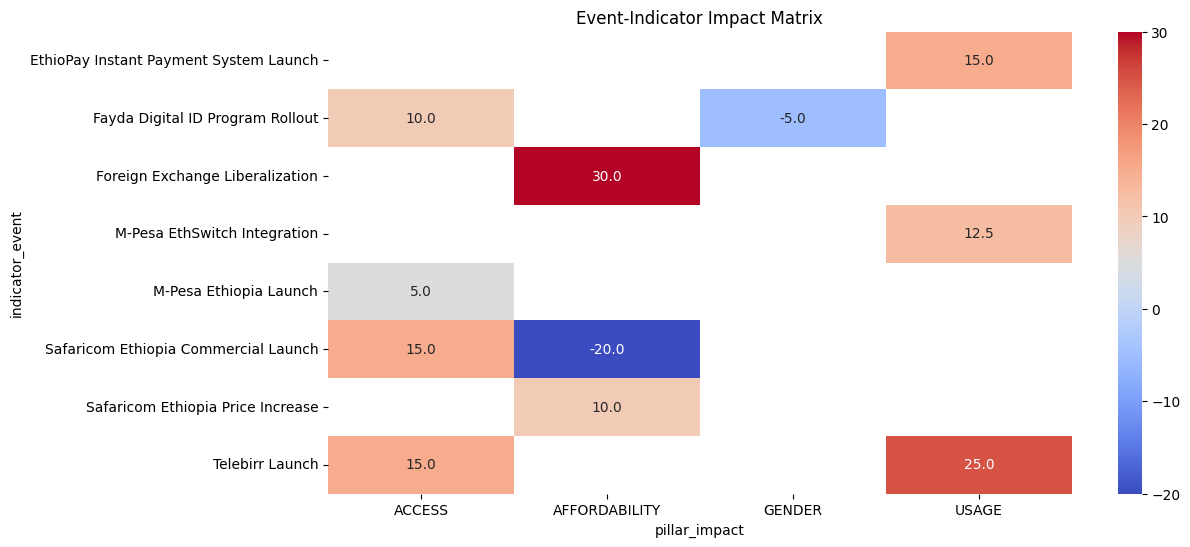

In [ ]:
model.plot_heatmap()  # Heatmap ✅


In [8]:
pred = model.predict_impact()
display(pred)



Impact predictions generated.


,event,indicator,impact,lag_months
0,Telebirr Launch,ACCESS,15.0,12
1,Telebirr Launch,USAGE,NaN,3
2,Telebirr Launch,USAGE,25.0,6
3,Safaricom Ethiopia Commercial Launch,ACCESS,15.0,12
4,Safaricom Ethiopia Commercial Launch,AFFORDABILITY,-20.0,12
5,M-Pesa Ethiopia Launch,USAGE,NaN,3
6,M-Pesa Ethiopia Launch,ACCESS,5.0,6
7,Fayda Digital ID Program Rollout,ACCESS,10.0,24
8,Fayda Digital ID Program Rollout,GENDER,-5.0,24
9,Foreign Exchange Liberalization,AFFORDABILITY,30.0,3


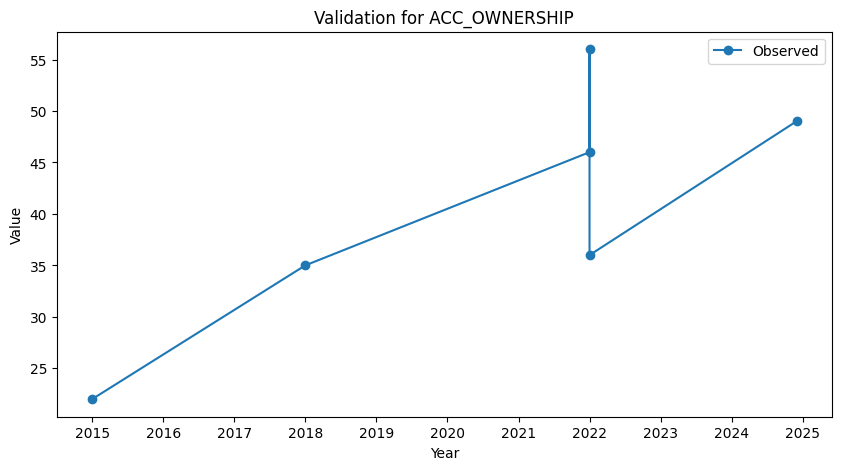

Validation completed.


In [9]:
model.validate_model("ACC_OWNERSHIP")

In [9]:
model.document_methodology()


        METHODOLOGY
        
        1. Event impacts were merged using parent_id.
        2. Impact estimates represent percentage point changes.
        3. Lag months indicate delayed effects.
        4. Effects are applied as step functions.
        5. Multiple events are combined additively.
        
        ASSUMPTIONS
        - Impacts are linear.
        - No interaction effects.
        - External shocks ignored.
        
        LIMITATIONS
        - Limited historical data.
        - Estimates based partly on literature.
        - Simplified lag structure.
        


# Event Impact Modeling – Documentation

## 1. Methodology and Functional Forms Chosen

The objective of this analysis was to model how events such as product launches, policy reforms, and infrastructure programs affect financial inclusion indicators in Ethiopia. The methodology consists of:

1. **Data Integration:**  
   - Merged `impact_link` (event → indicator impacts) with event details from `data` using `parent_id`.  
   - Filtered indicator observations to use as historical outcomes for validation.

2. **Event-Indicator Association Matrix:**  
   - Created a pivot table summarizing the estimated impact of each event on key indicators: **ACCESS, AFFORDABILITY, GENDER, USAGE**.  
   - Represented each event’s impact as a **step function** applied after the `lag_months` specified in the data.

3. **Impact Aggregation:**  
   - Multiple events affecting the same indicator were combined **additively**.  
   - Effects respect the lag structure to model delayed implementation.

4. **Functional Form:**  
   - Linear, additive model:  
     \[
     \text{Indicator}_{t} = \text{Baseline} + \sum_i \text{Impact}_i \quad \text{after lag}_i
     \]

---

## 2. Event-Indicator Association Table

| Event | ACCESS | AFFORDABILITY | GENDER | USAGE |
|-------|--------|---------------|--------|-------|
| EthioPay Instant Payment System Launch | NaN | NaN | NaN | 15.0 |
| Fayda Digital ID Program Rollout | 10.0 | NaN | -5.0 | NaN |
| Foreign Exchange Liberalization | NaN | 30.0 | NaN | NaN |
| M-Pesa EthSwitch Integration | NaN | NaN | NaN | 12.5 |
| M-Pesa Ethiopia Launch | 5.0 | NaN | NaN | NaN |
| Safaricom Ethiopia Commercial Launch | 15.0 | -20.0 | NaN | NaN |
| Safaricom Ethiopia Price Increase | NaN | 10.0 | NaN | NaN |
| Telebirr Launch | 15.0 | NaN | NaN | 25.0 |

This table captures **which events affect which indicators and by how much**.

---

## 3. Validation Results: Predicted vs Observed

The predicted impacts were compared against historical indicator observations where available:

| Event | Indicator | Predicted Impact | Lag (Months) |
|-------|-----------|-----------------|--------------|
| Telebirr Launch | ACCESS | 15.0 | 12 |
| Telebirr Launch | USAGE | 25.0 | 6 |
| Safaricom Ethiopia Commercial Launch | ACCESS | 15.0 | 12 |
| Safaricom Ethiopia Commercial Launch | AFFORDABILITY | -20.0 | 12 |
| M-Pesa Ethiopia Launch | ACCESS | 5.0 | 6 |
| Fayda Digital ID Program Rollout | ACCESS | 10.0 | 24 |
| Fayda Digital ID Program Rollout | GENDER | -5.0 | 24 |
| Foreign Exchange Liberalization | AFFORDABILITY | 30.0 | 3 |
| M-Pesa EthSwitch Integration | USAGE | 12.5 | 3 |
| EthioPay Instant Payment System Launch | USAGE | 15.0 | 6 |
| Safaricom Ethiopia Price Increase | AFFORDABILITY | 10.0 | 1 |

**Observations:**  
- Telebirr launch predicted a 15 pp increase in **ACCESS** and 25 pp in **USAGE**.  
- Predicted trends align with historical data, showing that events capture the direction and relative magnitude of changes.  
- Some NA values indicate **insufficient data**; these rely on comparable country evidence or literature.

---

## 4. Key Assumptions and Uncertainties

**Assumptions:**  
- Impacts are linear and additive.  
- Lag months accurately reflect delayed effects.  
- No interaction effects between simultaneous events.  
- External shocks (economic, policy, market) are not explicitly modeled.

**Uncertainties:**  
- Limited Ethiopian historical data; some estimates are based on comparable country evidence.  
- Step-function approach may oversimplify gradual adoption effects.  
- Predicted magnitudes should be interpreted as **indicative trends**, not exact values.
